In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from collections import Counter
from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalanceCascade
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
data = pd.read_csv("creditcardfraud/creditcard1.csv")

In [3]:
#data.head()
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Nature of transaction across Time

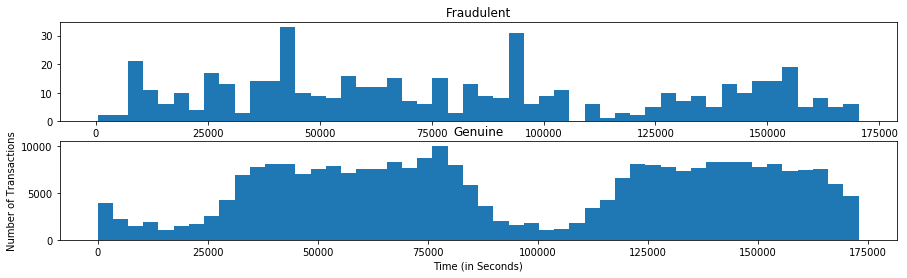

In [6]:
fig = plt.figure(figsize = (15, 4))

ax = fig.add_subplot(2, 1, 1)
ax.hist(data.Time[data.Class == 1], bins = 50)
ax.set_title('Fraudulent')

ax = fig.add_subplot(2, 1, 2)
ax.hist(data.Time[data.Class == 0], bins = 50)
ax.set_title('Genuine')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions');

### Nature of transaction in relation to Amount

Text(0,0.5,'Number of Transactions')

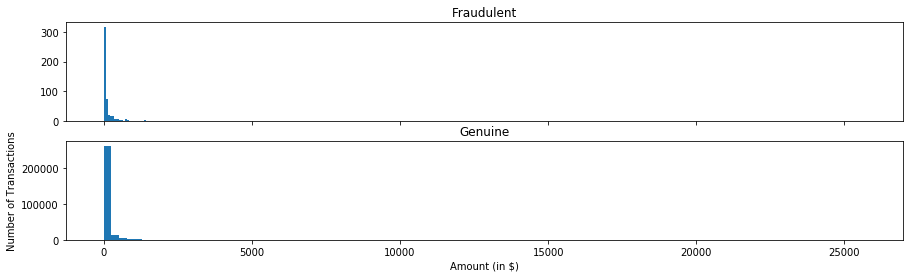

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,4))

ax1.hist(data.Amount[data.Class == 1], bins = 30)
ax1.set_title('Fraudulent')

ax2.hist(data.Amount[data.Class == 0], bins = 100)
ax2.set_title('Genuine')

plt.xlabel('Amount (in $)')
plt.ylabel('Number of Transactions')

In [8]:
print("Fraudulent Transaction Summary \n")
print(data.Amount[data.Class==1].describe())
print()
print("Genuine Transaction Summary \n")
print(data.Amount[data.Class==0].describe())


Fraudulent Transaction Summary 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Genuine Transaction Summary 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


### Normalizing the Amount variable

In [9]:
data["Amount_n"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))

C:\Users\patildp1992\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [10]:
df = data.drop(['Time','Amount'], axis = 1)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_n
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Variance explained by Principal Components

In [11]:
pve=[]

total_var = 0

c = df.shape[1]

for i in range(0, c - 2):       
        PC_Var = np.var(df.iloc[:,i])
        total_var += PC_Var

print(total_var)
            

30.731740131026065


In [12]:
var_exp = [(np.var(df.iloc[:,i])/total_var)*100 for i in range(0, c-1)]
#var_exp

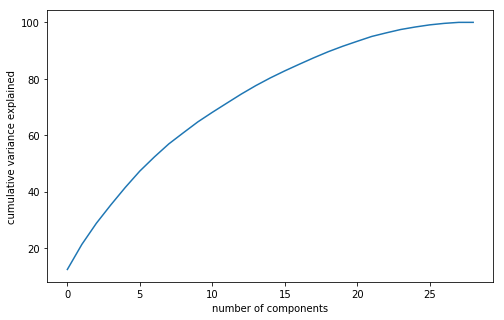

In [13]:
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize = (8,5))
plt.plot(cum_var_exp)
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')
plt.show()

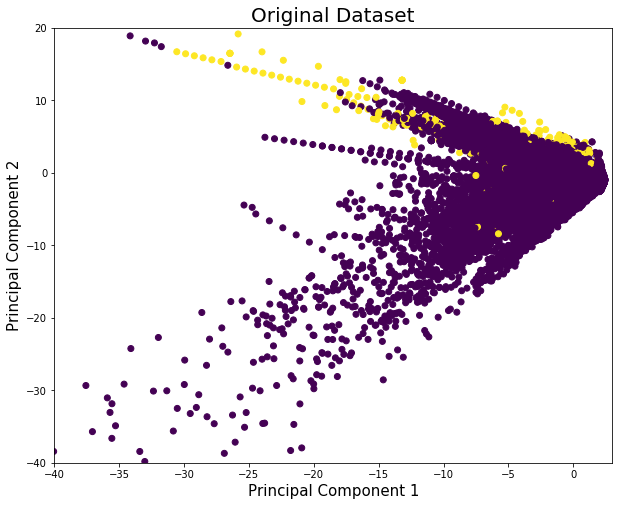

In [15]:
fig = plt.figure(figsize = (10,8))

plt.scatter(df['V1'], df['V2'], c=df['Class'], label = "Class " + str(df['Class']))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('Original Dataset', fontsize = 20)
plt.ylim(-40,20)
plt.xlim(-40, 3);

In [12]:
X = df.drop('Class',1).values

In [14]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

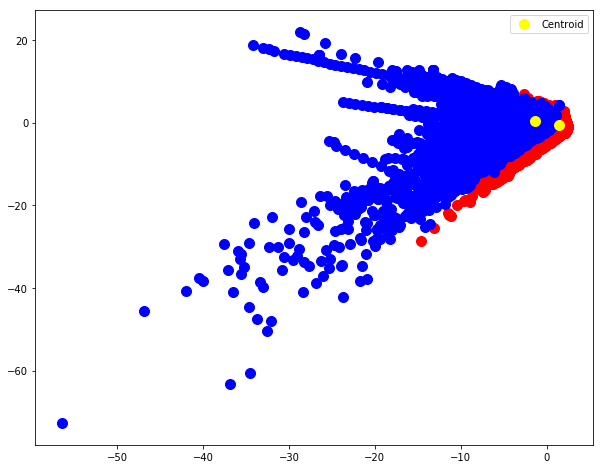

In [19]:
fig = plt.figure(figsize = (10,8))
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroid')

plt.legend()

# Class Imbalance

In [14]:
print(" No. of Genuine transactions = " + str(data['Class'].value_counts().iloc[0]))
print(" No. of Fraudulent transactions = " + str(data['Class'].value_counts().iloc[1]))

 No. of Genuine transactions = 284315
 No. of Fraudulent transactions = 492


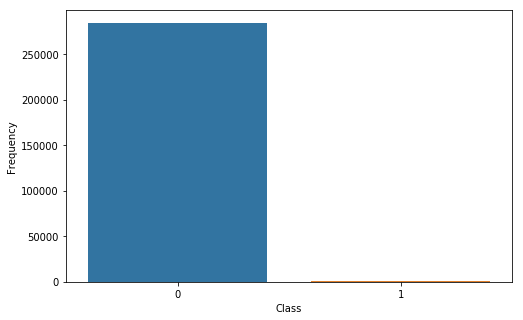

In [15]:
plt.figure(figsize = (8,5))
sns.countplot(data['Class'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The performance of machine learning algorithms is typically evaluated using predictive accuracy. However, this is not appropriate when the data is imbalanced and/or the costs of different errors vary markedly. In this case, the dataset contains 99.95% genuine transactions and 0.05% fraudulent transactions. A simple strategy of guessing the majority class will, thus, give a predictive accuracy of 99.95%.

However, the nature of the application requires a high accuracy rate for minority class. At the same time, predicting few of the  genuine transactions as fraudulent is, as such, not a critical problem. 


## Ways to approach a Classification Problem with Imbalanced Data

1. Collect More data?
    * A larger dataset might expose a different and perhaps more balanced perspective on the classes.
    * Can be useful while using resampling techniques.<br /><br />
    
2. Use performance metrics that go beyond traditional classification accuracy.<br /><br />

3. Try different resampling methods to regenerate a more balanced and unbiased training sets.<br /><br />

4. Try various Classification algorithms.


## Performance Measures:

#### Confusion Matrix:


|                 |  Predicted Negative  |  Predicted Positive  |
|-----------------|:--------------------:|---------------------:|
| Actual Negative |         TN           |         FP           |
| Actual Positive |         FN           |         TP           |


<br />The columns are the Predicted class and the rows are the Actual class.

TN - number of negative examples correctly classified<br />
FP - number of negative examples incorrectly classified as positive<br />
FN - number of positive examples incorrectly classified as negative<br />
TP - number of positive examples correctly classified <br />

The Receiver Operating Characteristic (ROC) curve is a standard technique for summarizing classifier performance over a range of tradeoffs between true positive and false positive error rates.<br />

On an ROC curve the X-axis represents **%FP = FP/(TN+FP)**  and the Y-axis represents **%TP = TP/(TP + FN)**. The ideal point on the ROC curve would be (0,100), i.e all positive examples are classified correctly and no negative examples are misclassified as positive.

Thus, Area under the ROC curve - AUC - is an useful measure for performance of a classifier as it is independent of decision criteria i.e threshold for classification and prior probabilities.

$$Overall Accuracy = \frac{TP + TN}{TP + FP + FN + TN }$$

$$Sensitivity = \frac{TP}{TP+FN}$$

$$Specificity = \frac{TN}{TN+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

$$Precision = \frac{TP}{TP+FP}$$

$$F =\frac{(1+\beta^2).recall.precision}{\beta^2.recall+precision}$$


RECALL : Also known as sensitivity --  many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one

F1 Score (or F-score): A weighted average of precision and recall.

### A Function to generate ROC curves

In [16]:
def ROC_Curve(y_score):
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()



### A Function to plot Confusion Matrix

In [72]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Seperating the data into features and dependent variable

In [18]:
X = df.drop('Class',1).values
y = df.iloc[:,28].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print("Number transactions in training dataset: ", len(X_train))
print("Number transactions in test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions in training dataset:  227845
Number transactions in test dataset:  56962
Total number of transactions:  284807


## Fitting Logistic Regression to original data

In [20]:
fold = KFold(len(y_train),5,shuffle=False) 

C_param = [0.01, 0.1, 1, 10, 20, 50]

for i in C_param:
    
    recall_accs = []
    
    for iteration, indices in enumerate(fold, start =1):
        classifier = LogisticRegression(C = i, penalty = 'l1')
        classifier.fit(X_train, y_train) 
        y_pred = classifier.predict(X_test)
        recall_acc = recall_score(y_test, y_pred)
        recall_accs.append(recall_acc)
    
    print(" C Parameter: "+ str(i)+ "  Mean Recall Score: " + str(np.mean(recall_accs)))

 C Parameter: 0.01  Mean Recall Score: 0.5742574257425742
 C Parameter: 0.1  Mean Recall Score: 0.6039603960396039
 C Parameter: 1  Mean Recall Score: 0.6336633663366337
 C Parameter: 10  Mean Recall Score: 0.6435643564356436
 C Parameter: 20  Mean Recall Score: 0.6435643564356436
 C Parameter: 50  Mean Recall Score: 0.6435643564356436


In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 10, penalty = 'l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   36    65]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.88      0.64      0.74       101

avg / total       1.00      1.00      1.00     56962



Confusion matrix, without normalization
[[56852     9]
 [   36    65]]


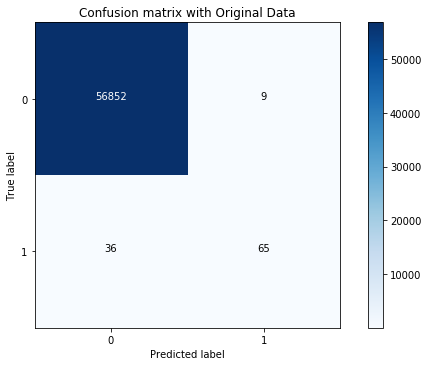

In [59]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix with Original Data')

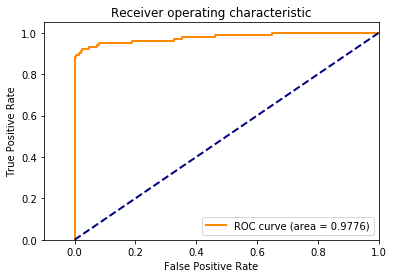

In [60]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

ROC_Curve(y_score)

In [30]:
print("Sensitivity/Recall metric for Undersampled dataset: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("Specificity metric for Undersampled dataset: ", cm[0,0]/(cm[0,0]+cm[0,1]))

Sensitivity/Recall metric for Undersampled dataset:  0.6435643564356436
Specificity metric for Undersampled dataset:  0.9998417192803504


## Random Undersampling of majority class

In [39]:

no_fraud_trans = len(df[df.Class == 1])

fraud_indices = np.array(df[df.Class==1].index)

normal_indices = np.array(df[df.Class==0].index)

random_normal_indices = np.array((np.random.choice(normal_indices, no_fraud_trans, replace = False)))

undersamp_indices = np.concatenate([fraud_indices,random_normal_indices])

df_under = df.iloc[undersamp_indices,:]

X_under = df_under.drop('Class',1).values

y_under = df_under.iloc[:,28].values

print('Undersampled Data \n')

print("Total Number of Normal Transactions: ", len(df_under[df_under.Class == 0]))

print("Total Number of Fraud Transactions: ", len(df_under[df_under.Class == 0]))

print("Total Number of Transactions in new dataset: ", len(df_under))


Undersampled Data 

Total Number of Normal Transactions:  492
Total Number of Fraud Transactions:  492
Total Number of Transactions in new dataset:  984


In [40]:

X_train_U, X_test_U, y_train_U, y_test_U = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

print("------------------------Splitting the undersampled dataset--------------------------\n")

print("Number transactions in training dataset: ", len(X_train_U))
print("Number transactions in test dataset: ", len(X_test_U))
print("Total number of transactions: ", len(X_train_U)+len(X_test_U))

------------------------Splitting the undersampled dataset--------------------------

Number transactions in training dataset:  688
Number transactions in test dataset:  296
Total number of transactions:  984


In [41]:

fold = KFold(len(y_train_U),5,shuffle=False) 

C_param = [0.01, 0.1, 1, 10]

for i in C_param:
    
    recall_accs = []
    
    for iteration, indices in enumerate(fold, start =1):
        classifier_U = LogisticRegression(C = i, penalty = 'l1')
        classifier_U.fit(X_train_U, y_train_U) 
        y_pred_U = classifier_U.predict(X_test_U)
        recall_acc = recall_score(y_test_U, y_pred_U)
        recall_accs.append(recall_acc)
    
    print(" C Parameter: "+ str(i)+ "  Mean Recall Score: " + str(np.mean(recall_accs)))
    
    

 C Parameter: 0.01  Mean Recall Score: 0.9387755102040817
 C Parameter: 0.1  Mean Recall Score: 0.9047619047619048
 C Parameter: 1  Mean Recall Score: 0.9251700680272108
 C Parameter: 10  Mean Recall Score: 0.9319727891156463


In [42]:
classifier_U = LogisticRegression(C = 0.01, penalty = 'l1')
classifier_U.fit(X_train_U, y_train_U)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred_U = classifier_U.predict(X_test_U)

In [44]:
cm_U = confusion_matrix(y_test_U, y_pred_U)
print(cm_U)

[[134  15]
 [  9 138]]


In [45]:
print(classification_report(y_test_U, y_pred_U))

             precision    recall  f1-score   support

          0       0.94      0.90      0.92       149
          1       0.90      0.94      0.92       147

avg / total       0.92      0.92      0.92       296



Confusion matrix, without normalization
[[134  15]
 [  9 138]]


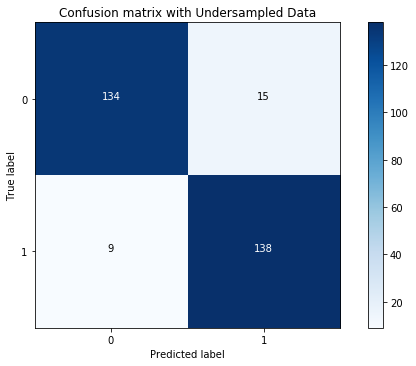

In [46]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_U, classes=class_names,
                      title='Confusion matrix with Undersampled Data')

In [47]:
print("Sensitivity/Recall metric for Undersampled dataset: ", cm_U[1,1]/(cm_U[1,0]+cm_U[1,1]))
print("Specificity metric for Undersampled dataset: ", cm_U[0,0]/(cm_U[0,0]+cm_U[0,1]))

Sensitivity/Recall metric for Undersampled dataset:  0.9387755102040817
Specificity metric for Undersampled dataset:  0.8993288590604027


#### Using the Undersampled Model to test on the Original Test Set

In [48]:
classifier_U = LogisticRegression(C = 0.01, penalty = 'l1')
classifier_U.fit(X_train_U, y_train_U)
y_pred_O = classifier_U.predict(X_test)

In [49]:
cm_UO = confusion_matrix(y_test, y_pred_O)

In [50]:
print(classification_report(y_test, y_pred_O))

             precision    recall  f1-score   support

          0       1.00      0.88      0.93     56861
          1       0.01      0.93      0.03       101

avg / total       1.00      0.88      0.93     56962



Confusion matrix, without normalization
[[49876  6985]
 [    7    94]]


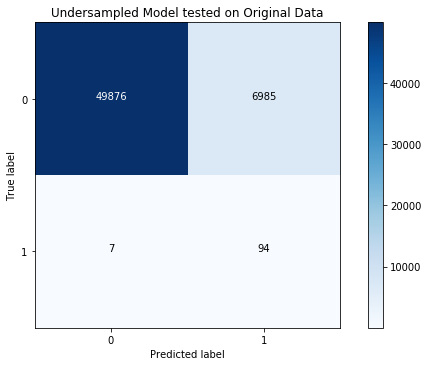

In [51]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_UO, classes=class_names,
                      title='Undersampled Model tested on Original Data')

In [52]:
print("Sensitivity/Recall metric for Undersampled dataset: ", cm_UO[1,1]/(cm_UO[1,0]+cm_UO[1,1]))
print("Specificity metric for Undersampled dataset: ", cm_UO[0,0]/(cm_UO[0,0]+cm_UO[0,1]))
print("Accuracy: ", (cm_UO[1,1]+cm_UO[0,0])/(cm_UO[1,1]+cm_UO[0,0]+cm_UO[1,0]+cm_UO[0,1]))

Sensitivity/Recall metric for Undersampled dataset:  0.9306930693069307
Specificity metric for Undersampled dataset:  0.8771565748052268
Accuracy:  0.8772515010006671


#### ROC Curve

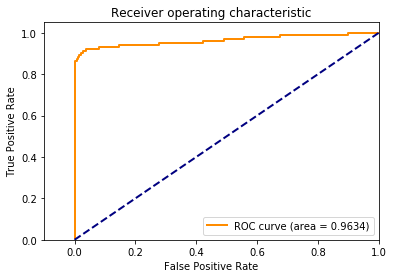

In [53]:

n_classes = 2
classifier_U = LogisticRegression(C = 0.01, penalty = 'l1')
y_score_U = classifier_U.fit(X_train_U, y_train_U).decision_function(X_test)

ROC_Curve(y_score_U)

# Ensemble methods

**A drawback of random undersampling is that it may result in loss of information as it does not explore potentially useful Majority Class data**

## Balanced Bagging

Bagging, also known as Bootstrap Aggregation, is an extremely powerful idea based on two things:

        1. Bootstrap   : Plenty of diverse observations, especially in case of Majority Class.
        2. Aggregation : Averaging over a set of classifiers helps reduce variance


The Balanced Bagging algorithm works as shown below:

        1. For each iteration, draw a bootstrap sample from the minority class. Randomly draw the same number of cases, 
           with replacement, from the majority class.
        2. Apply your desired classification algorithm 
        3. Repeat the two steps above for the number of times desired. Aggregate the predictions of the ensemble and make 
           the final prediction.

Reference : http://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf

In [47]:
from imblearn.ensemble import BalancedBaggingClassifier
balanced_bagging = BalancedBaggingClassifier(base_estimator = LogisticRegression(C = 0.01, penalty = 'l1'), random_state = 0)
balanced_bagging.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
             random_state=0, ratio='auto', replacement=False, verbose=0,
             warm_start=False)

In [48]:
print('Class distribution of the test set: {}'.format(Counter(y_test)))

Class distribution of the test set: Counter({0: 56861, 1: 101})


In [49]:
y_pred_balanced_bagging = balanced_bagging.predict(X_test)
print(classification_report(y_test, y_pred_balanced_bagging))
cm_balanced_bagging = confusion_matrix(y_test, y_pred_balanced_bagging)

             precision    recall  f1-score   support

          0       1.00      0.94      0.97     56861
          1       0.03      0.94      0.05       101

avg / total       1.00      0.94      0.97     56962



Confusion matrix, without normalization
[[53207  3654]
 [    6    95]]


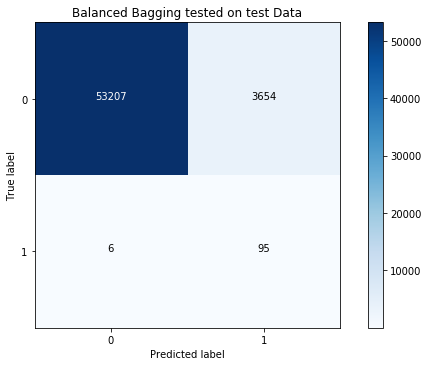

In [50]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_balanced_bagging, classes=class_names,
                      title='Balanced Bagging tested on test Data')

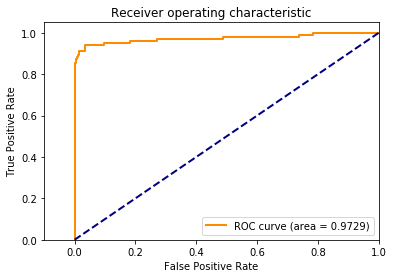

In [51]:
n_classes = 2

y_score_bb = balanced_bagging.fit(X_train, y_train).decision_function(X_test)

ROC_Curve(y_score_bb)

In [52]:
print("Sensitivity/Recall metric for Test dataset using Balanced Bagging: ", cm_balanced_bagging[1,1]/(cm_balanced_bagging[1,0]+cm_balanced_bagging[1,1]))
print("Specificity metric for Test dataset using Balanced Bagging: ", cm_balanced_bagging[0,0]/(cm_balanced_bagging[0,0]+cm_balanced_bagging[0,1]))
print("Accuracy: ", (cm_balanced_bagging[1,1]+cm_balanced_bagging[0,0])/(cm_balanced_bagging[1,1]+cm_balanced_bagging[0,0]+cm_balanced_bagging[1,0]+cm_balanced_bagging[0,1]))

Sensitivity/Recall metric for Test dataset using Balanced Bagging:  0.9405940594059405
Specificity metric for Test dataset using Balanced Bagging:  0.9357380278222331
Accuracy:  0.9357466381096169


## Easy Ensemble

### AdaBoost

AdaBoost is a boosting technique which helps you combine multiple weak classifiers into a single strong classifier.

AdaBoost helps in:
        
        1. Choosing the training set for each new classifier that you train based on the results of previous classifier.
        2. Determining weight to each classifier's results while combining results.
        
AdaBoost assigns a Weight to each training example to determine their probability of recurrence in the training set. After one of the iteration, if an example is misclassified, AdaBoost increases the weight on that particular observation so to make these examples a larger portion of next training set.

For each classifier a weight is assigned on the basis of it's accuracy.

$$ Weight = \frac{1}{2}ln(\frac{1 - Error}{Error})$$




For First classifier, equal probability is given to all training examples.

### Easy Ensemble

In EasyEnsemble, a sequence of classifiers are built by resampling the majority class.

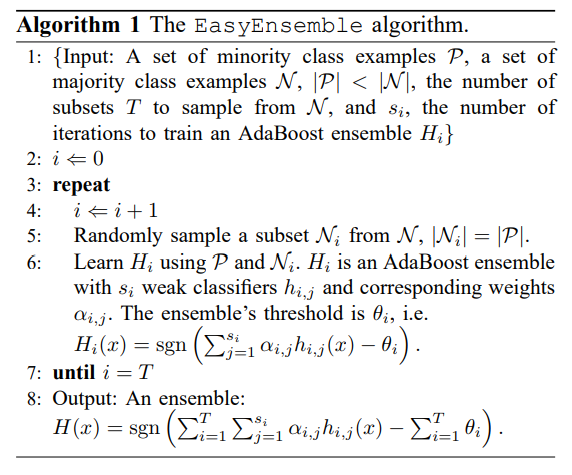


Reference: X. Y. Liu, J. Wu and Z. H. Zhou, “Exploratory Undersampling for Class-Imbalance Learning,” in IEEE Transactions on Systems, Man, and Cybernetics, Part B (Cybernetics), vol. 39, no. 2, pp. 539-550, April 2009

EasyEnsemble generates Balanced Subproblems using different majority class examples. The output of the paricular subproblem is an AdaBoost classifier, an ensemble of weak classifiers. 

By exploring features from each subset,this ensemble methods lets us discover diverse information for the majority class.

Boosting helps in reducing bias, by slow learning, while Bagging helps in reducing variance.

In [54]:
ee = EasyEnsemble(random_state=15)
X_ee, y_ee = ee.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_ee[0])))
X_ee.shape

Resampled dataset shape Counter({0: 391, 1: 391})


(10, 782, 29)

In [254]:
classifier_ee = LogisticRegression(C = 0.01, penalty = 'l1')
classifier_ee.fit(X_ee.reshape((7820,29)), y_ee.reshape((7820, )))
y_pred_ee = classifier_ee.predict(X_test)

In [255]:
print(classification_report(y_test, y_pred_ee))
cm_ee = confusion_matrix(y_test, y_pred_ee)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     56861
          1       0.07      0.91      0.14       101

avg / total       1.00      0.98      0.99     56962



Confusion matrix, without normalization
[[55708  1153]
 [    9    92]]


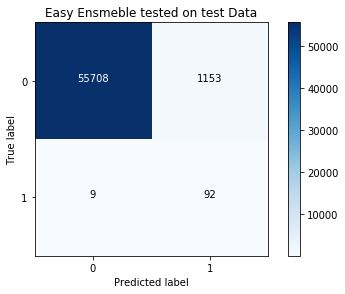

In [256]:
plot_confusion_matrix(cm_ee, classes=class_names,
                      title='Easy Ensmeble tested on test Data')

In [257]:
print("Sensitivity/Recall metric for Test dataset using Balanced Bagging: ", cm_ee[1,1]/(cm_ee[1,0]+cm_ee[1,1]))
print("Specificity metric for Test dataset using Balanced Bagging: ", cm_ee[0,0]/(cm_ee[0,0]+cm_ee[0,1]))
print("Accuracy: ", (cm_ee[1,1]+cm_ee[0,0])/(cm_ee[1,1]+cm_ee[0,0]+cm_ee[1,0]+cm_ee[0,1]))

Sensitivity/Recall metric for Test dataset using Balanced Bagging:  0.9108910891089109
Specificity metric for Test dataset using Balanced Bagging:  0.9797224811382143
Accuracy:  0.9796004353779713


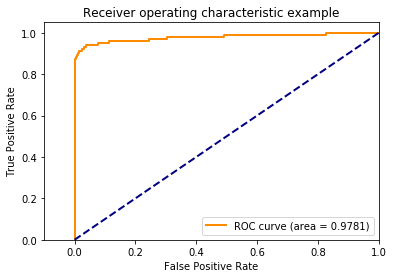

In [258]:
y_score = classifier_ee.fit(X_ee.reshape((7820,29)), y_ee.reshape((7820, ))).decision_function(X_test)

ROC_Curve(y_score)

# Oversampling

### Minority over-sampling with replacement

Essentially, as the minority class is over-sampled by increasing amounts, the effect is to identify similar
but more specific regions in the feature space as the decision region for the minority class. This leads to overfitting as the learning algorithm does not cause the decision boundary to make inroads into the majority class region.

## SMOTE -- Synthetic Minority Oversampling

In this resampling technique, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement.

Specifically, SMOTE takes each minority class sample and introduces "Synthetic examples" along the line segment joining any/all of the k minority class nearest neighbours. The number of neighbours are randomly chosen from the k nearest neighbours based on amount of oversampling. For e.g. if the amount of oversampling needed is 300%, three neighbours are chosen from kNN.

Steps in generating synthetic samples:

        1. Take the difference between the feature vector/sample under consideration and it's nearest neighbour
        2. Multiply the difference by a random number between 0 & 1
        3. Add the resulting vector to the sample under consideration


**In effect this procedure forces the decision region of the minority class to become more general and consider areas with predominant majority examples.**


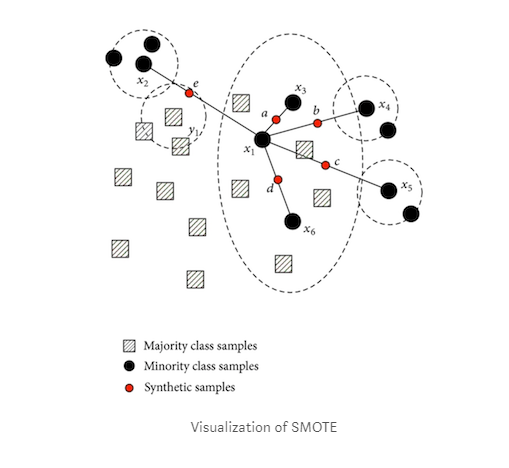

## The Wrong Way to oversample

**If we duplicate or synthesize new minority observations before, say leave one out cross validation, then we will be training the classifier with one or more instances that are exactly the same in the validation set.**

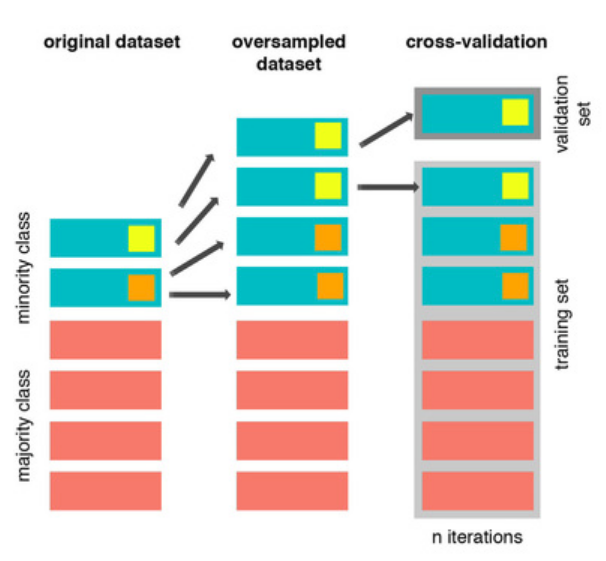

image : https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation

## The Right Way to oversample

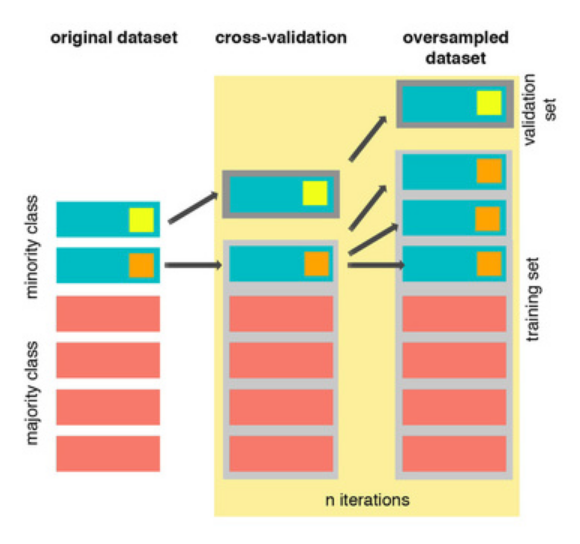

In [59]:
x_train_sm, x_val_sm, y_train_sm, y_val_sm = train_test_split(X_train,
                                                    y_train,
                                                    test_size =.2,
                                                    random_state=1)

In [60]:
sm = SMOTE(random_state = 1, ratio = 0.5)
x_train_res_sm, y_train_res_sm = sm.fit_sample(x_train_sm, y_train_sm)

C:\Users\patildp1992\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
clf_sm = LogisticRegression( C = 1, penalty = 'l1')
clf_sm.fit(x_train_res_sm, y_train_res_sm)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
cm_res_sm = confusion_matrix(y_val_sm, clf_sm.predict(x_val_sm))

In [63]:
print(cm_res_sm)
print("Recall metric USING validation dataset: ", cm_res_sm[1,1]/(cm_res_sm[1,0]+cm_res_sm[1,1]))

[[44916   569]
 [    7    77]]
Recall metric USING validation dataset:  0.9166666666666666


In [64]:
y_pred_orig_sm = clf_sm.predict(X_test)
cm_orig_sm = confusion_matrix(y_test, y_pred_orig_sm) 
print(cm_orig_sm)

[[56128   733]
 [    9    92]]


In [65]:
print(classification_report(y_test, y_pred_orig_sm))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     56861
          1       0.11      0.91      0.20       101

avg / total       1.00      0.99      0.99     56962



Confusion matrix, without normalization
[[56128   733]
 [    9    92]]


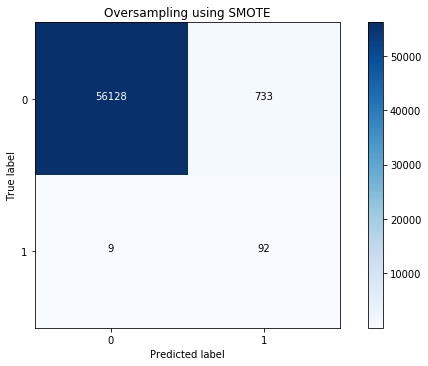

In [66]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_orig_sm, classes=class_names,
                      title='Oversampling using SMOTE')

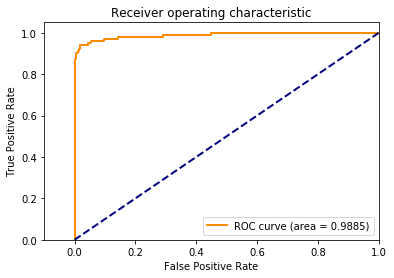

In [67]:
n_classes = 2

y_score = clf_sm.fit(x_train_res_sm, y_train_res_sm).decision_function(X_test)

ROC_Curve(y_score)

In [68]:
print("Sensitivity/Recall metric for Test dataset using SMOTE: ", cm_orig_sm[1,1]/(cm_orig_sm[1,0]+cm_orig_sm[1,1]))
print("Specificity metric for Test dataset using SMOTE: ", cm_orig_sm[0,0]/(cm_orig_sm[0,0]+cm_orig_sm[0,1]))
print("Accuracy: ", (cm_orig_sm[1,1]+cm_orig_sm[0,0])/(cm_orig_sm[1,1]+cm_orig_sm[0,0]+cm_orig_sm[1,0]+cm_orig_sm[0,1]))

Sensitivity/Recall metric for Test dataset using SMOTE:  0.9108910891089109
Specificity metric for Test dataset using SMOTE:  0.9871089147218656
Accuracy:  0.9869737719883431


## ADASYN : Adapative Synthetic Sampling

The idea behind ADASYN is to use weighted distribution for different minority class examples according to their difficulty in learning with more synthetic data generated for minority class examples that are harder to learn. 

Thus, compared to SMOTE, ADASYN approach improves learning in following ways:

        1. reducing the bias introduced by class imbalance
        2. shifting the decision boundary towards the more difficult minority class examples
        
        
The key idea behind this method of sampling makes use of density distribution to automatically decide the number of synthetic examples to be generated for each minority class examples. This is the major difference between ADASYN and SMOTE, which generates equal number of synthetic samples 

Steps in generating synthetic samples:

        1. Calculate the degree of class imbalance
        
        2. Calculate the number of synthetic examples to be generated for minority class based on desired balance level
        3. for each minority class examples find k nearest neighbours and calculate the fraction of neighbours belonging 
           to majority class 
        4. Normalize the fractions obtained for all minority class examples.
        5. Calculate the number of synthetic examples to be generated for each minority example based on Normalized fractions
         
        6. Use the process used by SMOTE to generate new synthetic examples. 
        
Reference:

In [23]:
ada = ADASYN(ratio = 0.5)
x_train_ad, x_val_ad, y_train_ad, y_val_ad = train_test_split(X_train,
                                                    y_train,
                                                    test_size =.2,
                                                    random_state=1)

In [24]:
x_train_res_ad, y_train_res_ad = ada.fit_sample(x_train_ad, y_train_ad)

C:\Users\patildp1992\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
print(len(x_train_res_ad))

272900


In [25]:
print(y_train_res_ad.sum())

90931


In [26]:
print(" No. of Fradulent transaction in newly generated data using ADASYN : " , y_train_res_ad.sum())

 No. of Fradulent transaction in newly generated data using ADASYN :  90931


In [27]:
clf_ad = LogisticRegression( C = 1, penalty = 'l1')
clf_ad.fit(x_train_res_ad, y_train_res_ad)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
cm_res_ad = confusion_matrix(y_val_ad, clf_ad.predict(x_val_ad))
cm_res_ad

array([[43209,  2276],
       [    6,    78]], dtype=int64)

In [29]:
y_pred_orig_ad = clf_ad.predict(X_test)
cm_orig_ad = confusion_matrix(y_test, y_pred_orig_ad) 
print(cm_orig_ad)
print("Recall metric USING original test dataset: ", cm_orig_ad[1,1]/(cm_orig_ad[1,0]+cm_orig_ad[1,1]))


[[54022  2839]
 [    4    97]]
Recall metric USING original test dataset:  0.9603960396039604


Confusion matrix, without normalization
[[54022  2839]
 [    4    97]]


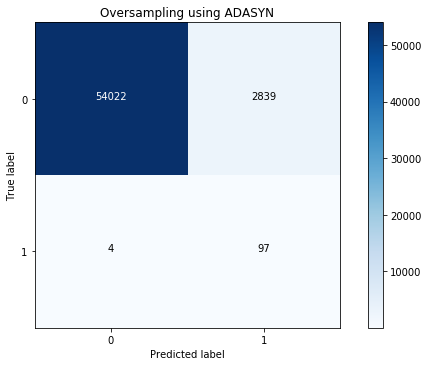

In [30]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_orig_ad, classes=class_names,
                      title='Oversampling using ADASYN')

In [31]:
print(classification_report(y_test, y_pred_orig_ad))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97     56861
          1       0.03      0.96      0.06       101

avg / total       1.00      0.95      0.97     56962



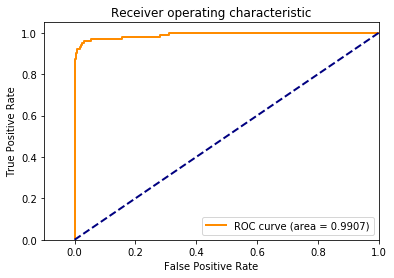

In [32]:
n_classes = 2

y_score = clf_ad.fit(x_train_res_ad, y_train_res_ad).decision_function(X_test)

ROC_Curve(y_score)

In [33]:
print("Sensitivity/Recall metric for Test dataset using ADASYN: ", cm_orig_ad[1,1]/(cm_orig_ad[1,0]+cm_orig_ad[1,1]))
print("Specificity metric for Test dataset using ADASYN: ", cm_orig_ad[0,0]/(cm_orig_ad[0,0]+cm_orig_ad[0,1]))

Sensitivity/Recall metric for Test dataset using ADASYN:  0.9603960396039604
Specificity metric for Test dataset using ADASYN:  0.9500712263238423


### Comparison b/w Sampling Methods ---- Using Logistic Regression 

|                  |               |  Oversampling Ratio  |  Sensitivity/Recall  |  Specificity |    AUC    |
|------------------|:-------------:|:--------------------:|:--------------------:|:------------:|:----------|
|    Original      |               |                      |         0.64         |     0.99     |   0.96    |
|                  |               |                      |                      |              |           |
|  Undersampling   |               |                      |         0.94         |     0.88     |   0.9689  |
|                  |               |                      |                      |              |           |
|  Oversampling    |     SMOTE     |        0.25          |         0.90         |     0.99     |   0.9970  |
|                  |     SMOTE     |        0.5           |         0.91         |     0.99     |   0.9885  |
|                  |     SMOTE     |         1            |         0.94         |     0.97     |   0.9898  |
|                  |               |                      |                      |              |           |
|  Oversampling    |    ADASYN     |        0.25          |         0.94         |     0.97     |   0.9900  |
|                  |    ADASYN     |        0.5           |         0.96         |     0.95     |   0.9907  |
|                  |    ADASYN     |         1            |         0.97         |     0.90     |   0.9911  |
|                  |               |                      |                      |              |           |
|    Ensemble      |BalancedBagging|                      |         0.94         |     0.93     |   0.9729  |
|                  |  EasyEnsemble |                      |         0.91         |     0.97     |   0.9781  |

## Using other classifiers on the balanced data generated by ADASYN
#### with Oversampling ratio of 0.5

### Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train_res_ad, y_train_res_ad)

GaussianNB(priors=None)

In [76]:
cm_res_ad_N = confusion_matrix(y_val_ad, naive.predict(x_val_ad))
cm_res_ad_N

array([[43648,  1837],
       [    6,    78]], dtype=int64)

In [77]:
y_pred_orig_ad_N = naive.predict(X_test)
cm_orig_ad_N = confusion_matrix(y_test, y_pred_orig_ad_N) 
print(cm_orig_ad_N)

[[54537  2324]
 [   12    89]]


In [78]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, naive.predict_proba(X_test)[:,1])

In [79]:
auc(false_positive_rate, true_positive_rate)

0.9740032188970115

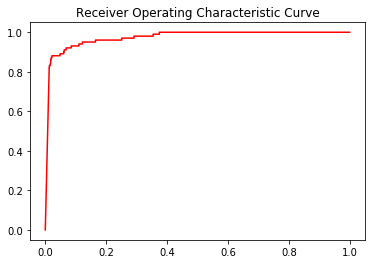

In [80]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate, true_positive_rate, color = 'r')

In [105]:
print("Sensitivity/Recall metric for Test dataset using ADASYN: ", cm_orig_ad_N[1,1]/(cm_orig_ad_N[1,0]+cm_orig_ad_N[1,1]))
print("Specificity metric for Test dataset using ADASYN: ", cm_orig_ad_N[0,0]/(cm_orig_ad_N[0,0]+cm_orig_ad_N[0,1]))

Sensitivity/Recall metric for Test dataset using ADASYN:  0.8811881188118812
Specificity metric for Test dataset using ADASYN:  0.9590932273438737


### Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['sqrt']
                    }

In [26]:
from sklearn.grid_search import RandomizedSearchCV

RF = RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [27]:
RF.fit(x_train_res_ad, y_train_res_ad)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['sqrt']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [28]:
print(RF.best_params_)

{'n_estimators': 30, 'min_samples_leaf': 60, 'max_features': 'sqrt'}


In [29]:
cm_res_ad_RF = confusion_matrix(y_val_ad, RF.predict(x_val_ad))
cm_res_ad_RF

array([[45427,    58],
       [    9,    75]], dtype=int64)

In [30]:
y_pred_orig_ad_RF = RF.predict(X_test)
cm_orig_ad_RF = confusion_matrix(y_test, y_pred_orig_ad_RF) 
print(cm_orig_ad_RF)

[[56793    68]
 [   13    88]]


Confusion matrix, without normalization
[[56793    68]
 [   13    88]]


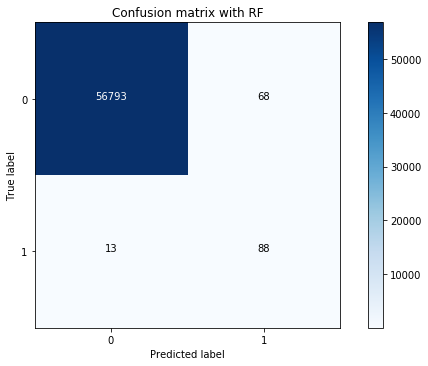

In [73]:
plt.figure(figsize = (8,5))
class_names = [0,1]
plot_confusion_matrix(cm_orig_ad_RF, classes=class_names,
                      title='Confusion matrix with RF')

In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])

In [68]:
auc(false_positive_rate, true_positive_rate)

0.9857923464916443

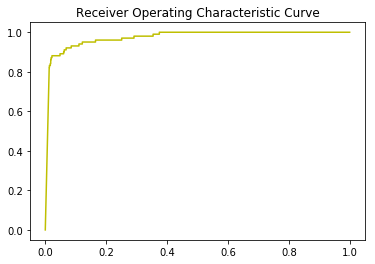

In [74]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate, true_positive_rate, color = 'y')


In [31]:
print("Sensitivity/Recall metric for Test dataset using ADASYN: ", cm_orig_ad_RF[1,1]/(cm_orig_ad_RF[1,0]+cm_orig_ad_RF[1,1]))
print("Specificity metric for Test dataset using ADASYN: ", cm_orig_ad_RF[0,0]/(cm_orig_ad_RF[0,0]+cm_orig_ad_RF[0,1]))


Sensitivity/Recall metric for Test dataset using ADASYN:  0.8712871287128713
Specificity metric for Test dataset using ADASYN:  0.9988041012293136
